Import Required Packages


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

Load Dataset

In [ ]:
data = pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
data

View dimensionns of dataset

In [ ]:
data.shape

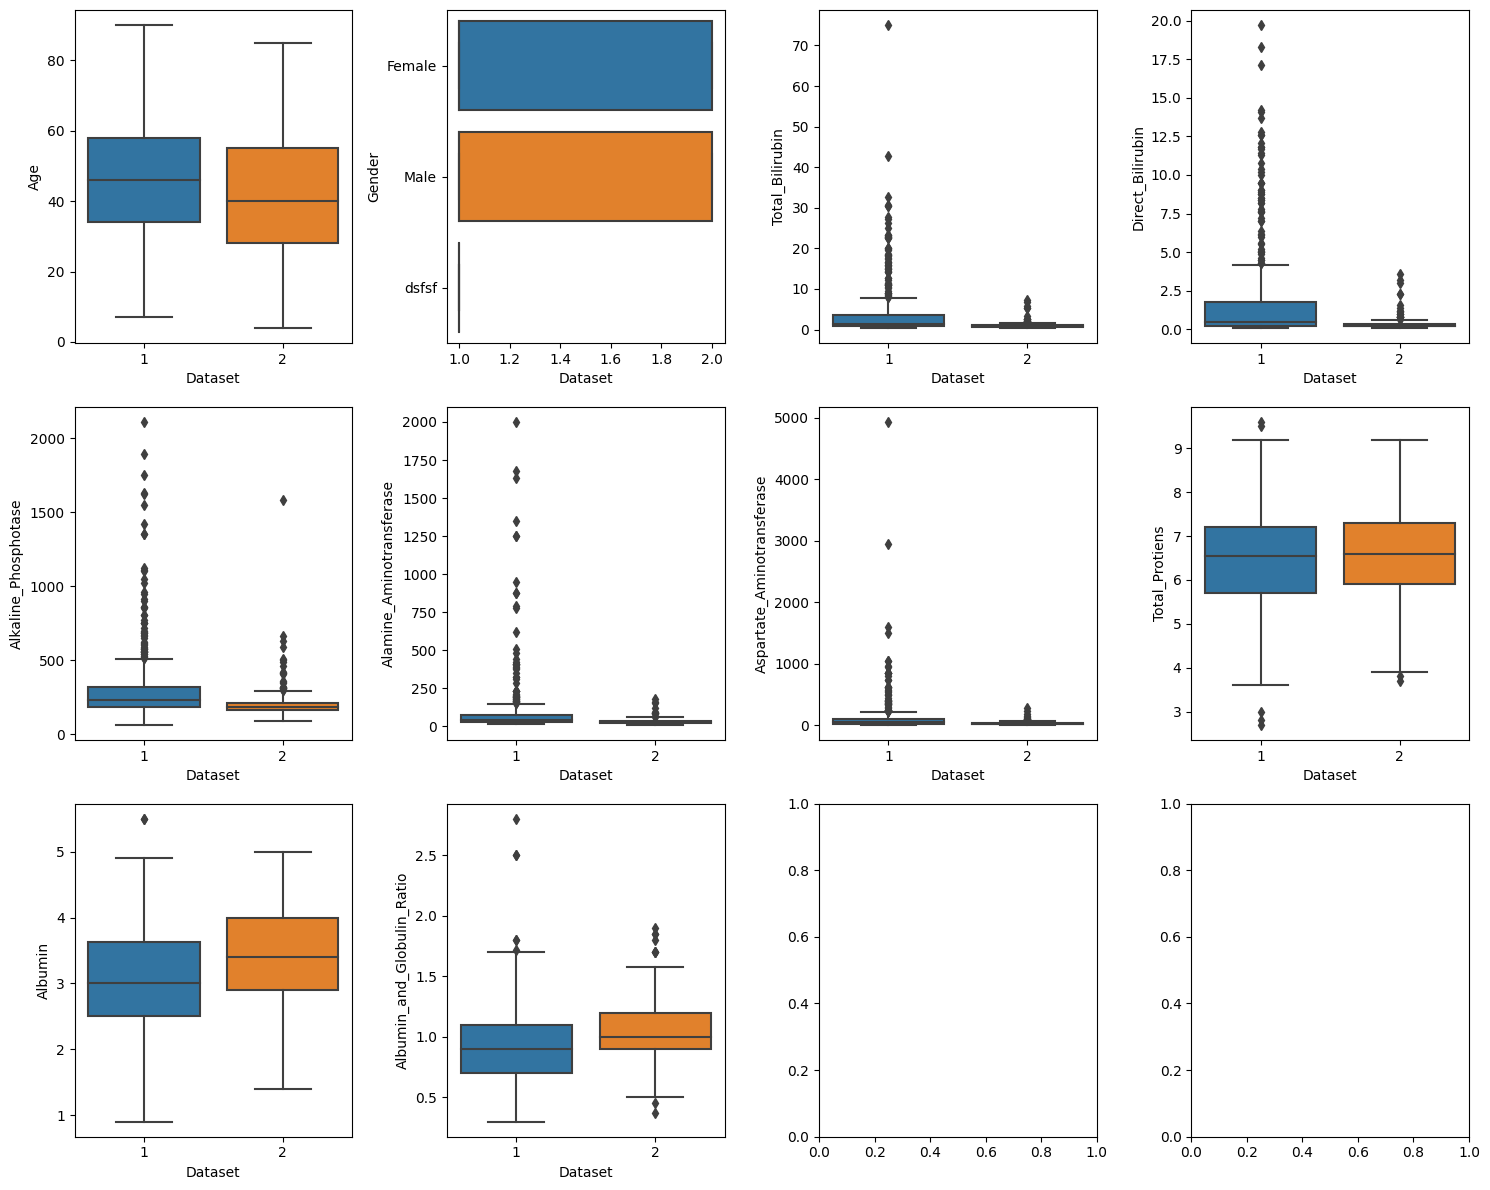

In [ ]:
# Plot boxplots to identify outliers
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]):
    sns.boxplot(x="Dataset", y=column, data=data, ax=axes[i])
plt.tight_layout()
plt.show()

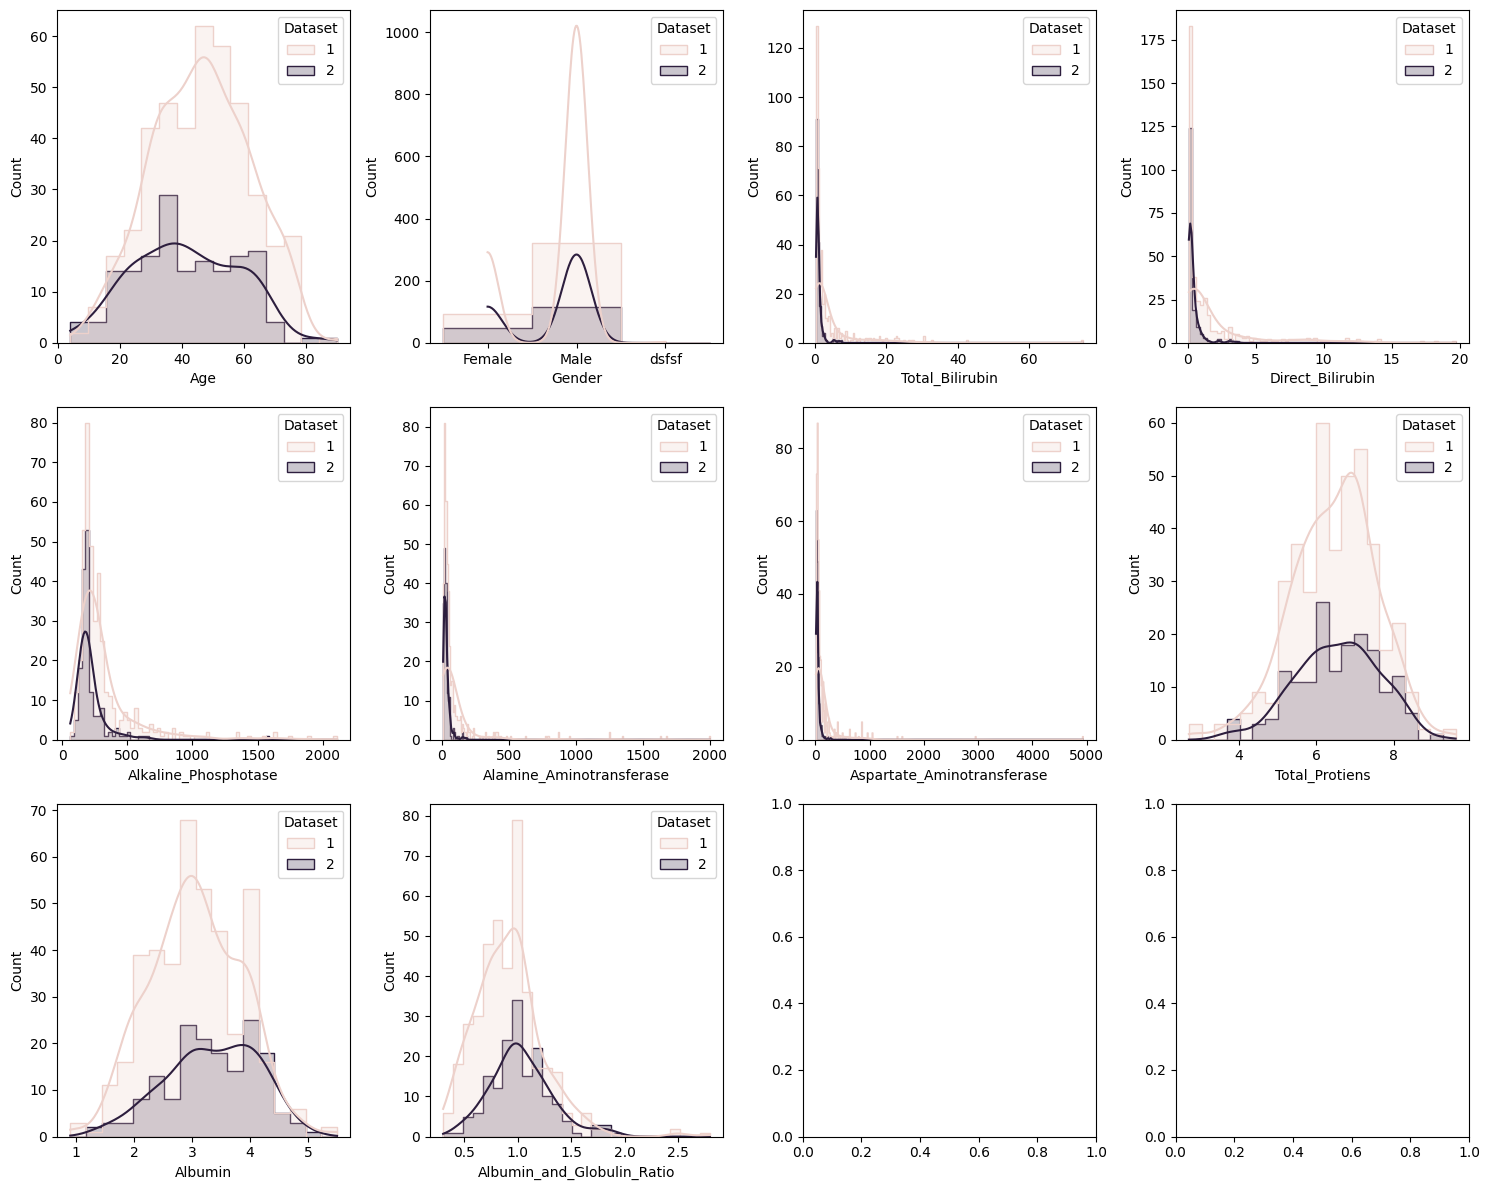

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]):
    sns.histplot(data=data, x=column, hue="Dataset", element="step", kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

Preview the Dataset

In [ ]:
data.head()

Exploratory Data Analysis

<Axes: >

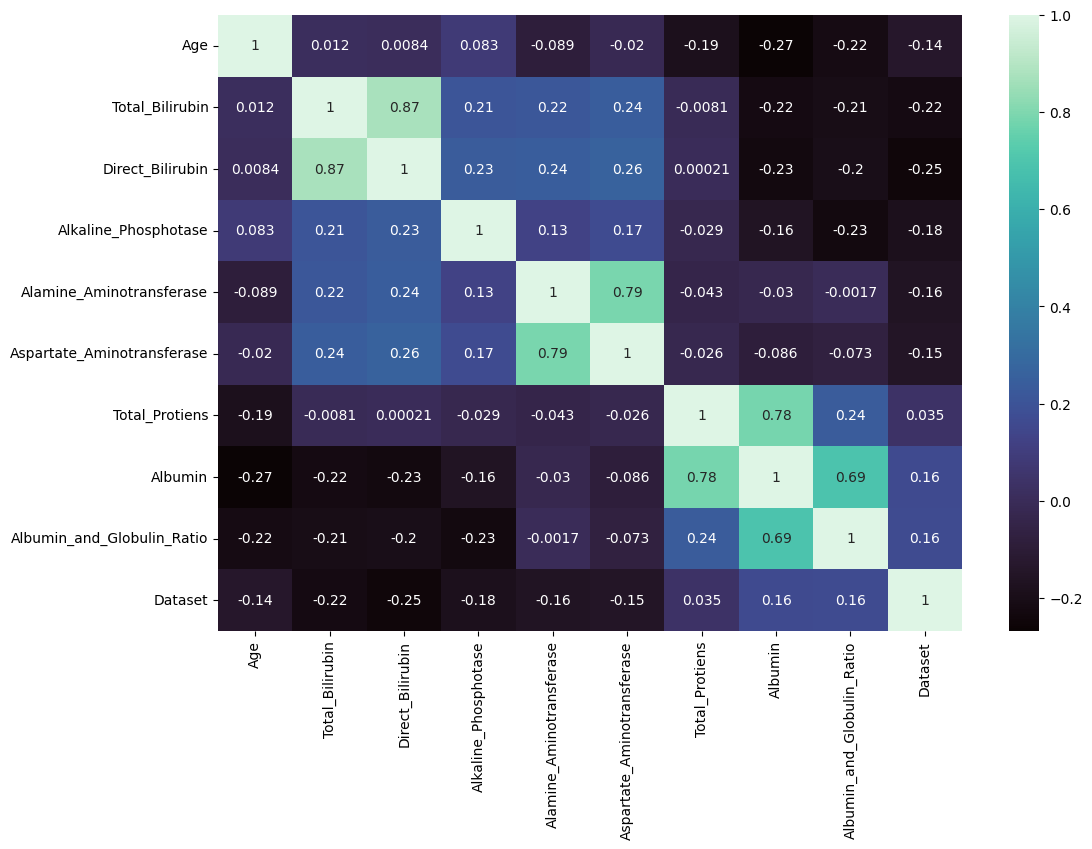

In [ ]:
import seaborn as sns
plt.figure(figsize = (12,8))
data_corr = data.corr(numeric_only = True)
sns.heatmap(data_corr,annot = True,cmap = 'mako')

In [ ]:
data.head()

In [ ]:
#check the unique value of dataset
data['Dataset'].unique()

Check for missing values

In [ ]:

data.isna().sum()

In [ ]:
data.isna().mean()

View summary of dataset

In [ ]:
data.info()

In [ ]:
# import matplotlib.pyplot as plt

# # Create box plots for each attribute
# attributes = data['Dataset']  # Exclude the 'Dataset' column
# for attribute in attributes:
#     plt.figure()
#     data.boxplot(column=attribute)
#     # plt.title(attribute)
#     plt.show()

In [ ]:
data['Gender'].value_counts().plot(kind = 'pie')
# plt.figure(figsize = (10,6))
plt.title("The graph of Gender value counts")
plt.legend()
plt.show()

In [ ]:
data.head(3)

Check the data types of columns

In [ ]:
data.dtypes

View Statistical Properties of datset

In [ ]:
data.describe()

In [ ]:
#Checking duplicates in the dataset
data.duplicated().sum()

In [ ]:
def preprocessing_inputs(df):
  df = df.copy()
  # remove unneed col
  df = df.drop(['Direct_Bilirubin','Albumin'],axis = 1)
  #fill missing categorical value
  df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
  #Label Encoder
  le = LabelEncoder()
  df['Gender'] = le.fit_transform(df['Gender'])
  #fill missing integer val
  missing_val_col = ['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                   'Albumin_and_Globulin_Ratio']
  for column in missing_val_col:
      df[column] = df[column].fillna(df[column].mean())
  # train test split data
  y = df['Dataset']
  X = df.drop(['Dataset'],axis = 1)
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2,shuffle = True)
  # Standardization of feature dataset
  scaler = StandardScaler()
  scaler.fit(X_train)
  ############
  #Save the scaler model for deployment
  
  import pickle
  pickle.dump(scaler,open('scaling.pkl','wb'))
  X_train = scaler.transform(X_train)
  X_test =  scaler.transform(X_test)
  return X_train,X_test,y_train,y_test
  # return df



In [ ]:
#Load the Scaler model
# sc_loaded=pickle.load(open('scaling.pkl','rb'))

In [ ]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)
# X = preprocessing_inputs(data)

#Checking standardized matrix where every attribute lie in between 0 and 1.

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# X_train['Gender'].value_counts().plot(kind = 'pie')
# # plt.figure(figsize = (10,6))
# plt.title("The graph of Gender value counts")
# plt.legend()
# plt.show()

In [ ]:
# X_train

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train,y_train)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

In [ ]:
y_pred_gng = gnb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_gng)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv_result = cross_validate(tree,X_train,y_train,cv = 5)

In [ ]:
cv_result


In [ ]:
cv_result['test_score']

In [ ]:
from sklearn.model_selection import GridSearchCV

#Tuning the model using grid search crossvalidation

In [ ]:
params = {
    "min_samples_leaf" : [1,2,3],
    "max_depth" :[1,2,3],
    "criterion" : ["gini","entropy","log_loss"]
}

In [ ]:
tree1 = DecisionTreeClassifier(random_state=123)

In [ ]:
grid = GridSearchCV(estimator = tree1,param_grid=params,cv = 5,n_jobs = 4,verbose=2)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
tree2 = DecisionTreeClassifier(criterion = "entropy",max_depth = 1,min_samples_leaf = 1,random_state = 123)

In [ ]:
tree2.fit(X_train,y_train)

In [ ]:
y_pred = tree2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print("Confusion_Matrix\n",cm)

In [ ]:
clr = classification_report(y_pred,y_test)

In [ ]:
print("Classificaion_Report\n",clr)

In [ ]:
Bernoulli = BernoulliNB()

In [ ]:
Bernoulli.fit(X_train,y_train)

In [ ]:
Random = RandomForestClassifier()

In [ ]:
tree2 = DecisionTreeClassifier(criterion = "entropy",max_depth = 1,min_samples_leaf = 1,random_state = 123)

In [ ]:
Random.fit(X_train,y_train)

In [ ]:
y_pred_random = Random.predict(X_test)

In [ ]:
y_pred_random

In [ ]:
accuracy_score(y_test,y_pred_random)

In [ ]:
import pickle
pickle.dump(tree2,open("model.pkl",'wb'))

In [ ]:
from ast import Name
def model_fit(xtrain,xtest,ytrain,ytest,model,name):
  model.fit(xtrain,ytrain)
  model_pred = model.predict(xtest)
  result = {"model":Name}
  result['Accuracy']=np.around((accuracy_score(ytest,model_pred)))
  result['Precision']=np.around((precision_score(ytest,model_pred)))
  result['Recall']=np.around((recall_score(ytest,model_pred)))
  result['F1_score']=np.around((f1_score(ytest,model_pred)))
  print(" ===================== ")
  print("============Model Result=============")
  print(name)
  print(classification_report(ytest,model_pred))
  print("Model Accuracy",result['Accuracy'])
  print("Model Precision",result['Precision'])
  print("Model Recall",result['Recall'])
  print("Model f1_score",result['F1_score'])
  return result

In [ ]:
import numpy as np
from sklearn.metrics import precision_score,recall_score,f1_score
Random = RandomForestClassifier()

In [ ]:
Random_result = model_fit(X_train,X_test,y_train,y_test,Random,"RandomForestClassifier")

In [ ]:
#Tuning the model using grid search crossvalidation for random forest
params={'max_leaf_nodes': list(range(1,8)),
        'min_samples_split': list(range(2,3,4))}
rf_gscv=GridSearchCV(Random, 
                  params,
                  verbose=1,
                  cv=3)
rf_gscresult=model_fit(X_train,X_test,y_train,y_test,rf_gscv,'GridSearchCV')

In [ ]:
#Tuning the model using Randomized search crossvalidation for Random Forest
params={'max_leaf_nodes': list(range(1,8)),
        'min_samples_split': list(range(2,3,4))}
Random_randscv=RandomizedSearchCV(tree1,params,random_state=13)
rf_randscvresult=model_fit(X_train,X_test,y_train,y_test,Random_randscv,'RandomizedSearchCV')

In [ ]:
# Implementing Bernoilli naive bayes for classification
Bernoulli =BernoulliNB()
bnbresult=model_fit(X_train,X_test,y_train,y_test,Bernoulli,'BernouliNB')

In [ ]:
#Tuning the model using Randomized search crossvalidation for Decision Tree Classifier
params={'max_leaf_nodes': list(range(1,8)),
        'min_samples_split': list(range(2,3,4))}
randscv=RandomizedSearchCV(tree1,params,random_state=13)
randscvresult=model_fit(X_train,X_test,y_train,y_test,randscv,'RandomizedSearchCV')

In [ ]:
tree2 = DecisionTreeClassifier(criterion = "entropy",max_depth = 1,min_samples_leaf = 1,random_state = 128)

In [ ]:
Tree_Decision = model_fit(X_train,X_test,y_train,y_test,tree2,"DecisionTreeClassifier")

In [ ]:
# X_train.head()

In [ ]:
import pickle

In [ ]:
#pickle.dump(tree2,open('Decision_Model.pkl','wb'))

In [ ]:
#pickled_model=pickle.load(open('Decision_Model.pkl','rb'))

In [ ]:
X_train

In [ ]:
#Dumping the model for deployment
pickle.dump(Random_randscv,open('Random_Forest.pkl','wb'))

pickle.dump(Bernoulli,open('Bernouli_NB.pkl','wb'))
pickle.dump(tree2,open('Decision_Tree.pkl','wb'))
pickle.dump(rf_gscv,open('Grid_SearchCV.pkl','wb'))
# import pickle
# pickle.dump(tree2,open("model.pkl",'wb'))

In [ ]:
#Loading the model
rf_loaded=pickle.load(open('Random_Forest.pkl','rb'))

bnb_loaded=pickle.load(open('Bernouli_NB.pkl','rb'))
dt_loaded=pickle.load(open('Decision_Tree.pkl','rb'))
gscv_loaded=pickle.load(open('Grid_SearchCV.pkl','rb'))

In [ ]:
#Checking the model of random forest
# _loaded.predict(X_test)

In [ ]:
#Checking the model of random forest
rf_loaded.predict(X_test)

In [ ]:
#Checking the model of Bernouli Naive Bayes
bnb_loaded.predict(X_test)

In [ ]:
#Checking the model of Decision Tree
dt_loaded.predict(X_test)

In [ ]:
#Saving the results in csv file
Final_Outcome ={
    'Model':['Random Forest','Decision Tree','Bernouli NB'],
    'Accuracy':[0.735, 0.732,0.682],
    'Precision':[0.779, 0.752,0.752],
    'Recall':[0.682, 1.0,1.0],
    'F1_Score':[0.727, 0.859, 0.859],
}
outcome=pd.DataFrame(Final_Outcome)
file='Final_Outcome.csv'
outcome.to_csv(file,index=False)

In [ ]:
#Crosschecking the file by reading it
outcome=pd.read_csv('Final_Outcome.csv')

In [ ]:
#check the output
outcome

,Model,Accuracy,Precision,Recall,F1_Score
0,Random Forest,0.735,0.779,0.682,0.727
1,Decision Tree,0.732,0.752,1.000,0.859
2,Bernouli NB,0.682,0.752,1.000,0.859
